In [3]:
# 구글 드라이브 불러오기

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Stochastics

### Random Numbers


In [4]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [5]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [6]:
# rand
npr.seed(100) 
np.set_printoptions(precision=4) # n번째 자리수까지 출력하라

In [7]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [8]:
a = 5
b = 10
npr.rand(10) * ( b - a ) +a

array([9.4566, 6.046 , 5.9266, 5.5419, 6.0985, 9.8931, 9.0584, 5.8597,
       9.0811, 6.3704])

In [9]:
npr.rand(5, 5) * (b - a) + a

array([[7.1585, 9.7001, 9.0882, 6.6806, 5.8771],
       [6.8642, 5.0284, 6.2621, 8.9783, 5.0763],
       [7.9942, 8.019 , 5.5257, 6.9097, 5.1824],
       [9.4521, 9.9046, 5.2997, 9.4527, 7.8845],
       [8.7124, 8.1509, 7.9092, 5.1022, 6.0501]])

In [10]:
# make graph

sample_size = 500
rn1 = npr.rand(sample_size, 3) # Uniformly distributed random numbers.
rn2 = npr.randint(0, 10, sample_size) # Random integers for a given interval.
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size = sample_size)

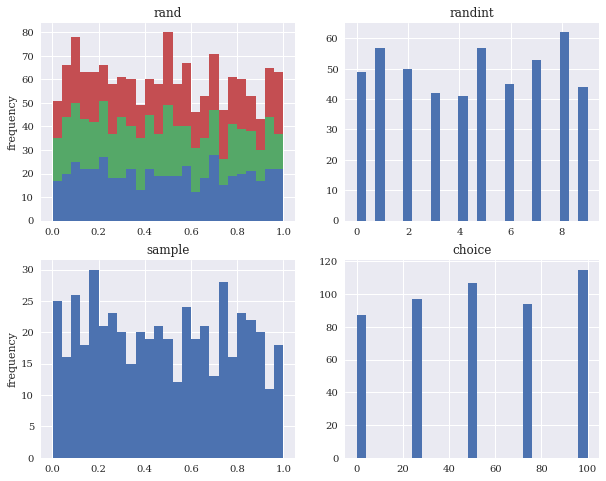

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');

In [12]:
# 각종 분포의 그래프 (Random numbers)
# 표준정규분포 - 정규분포 - 카이제곱분포 - 포아송분포 순서

sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

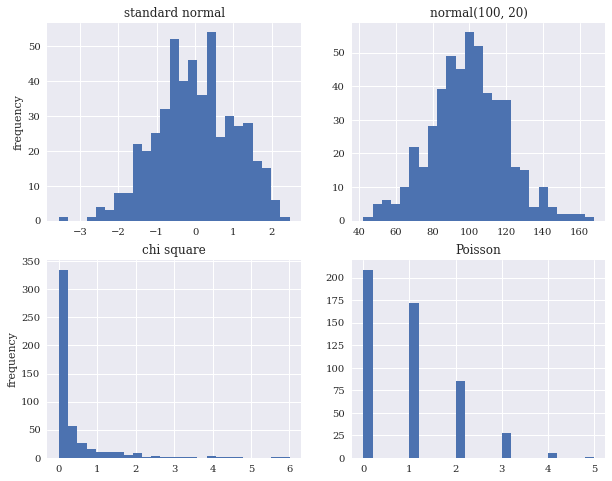

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

### Simulation

#### Random Variables

BSM model

$S_t = S_0 \exp((r-\frac{1}{2}\sigma^2)T + \sigma\sqrt(T)z) $

In [14]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

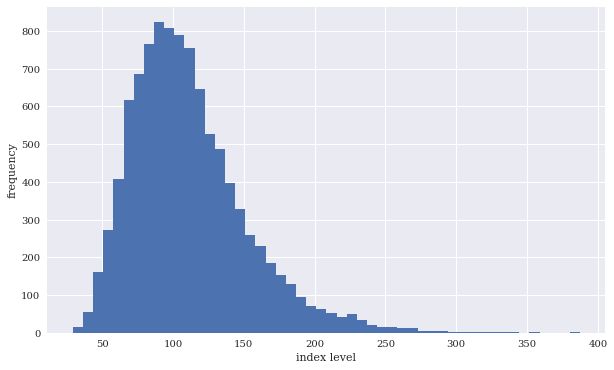

In [15]:
plt.figure(figsize=(10,6))
plt.hist(ST1, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [16]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)

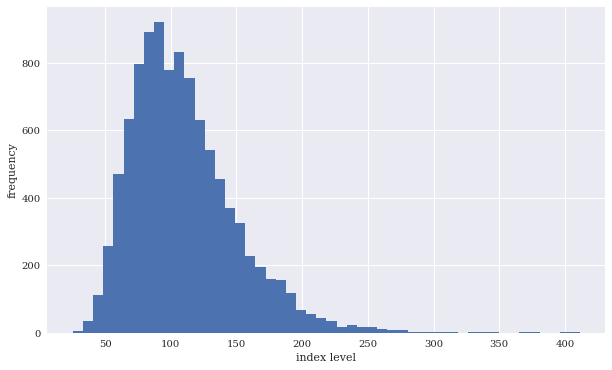

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [18]:
import scipy.stats as scs

In [19]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
          ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), 
                                  np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [20]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         29.291         25.399
           max        387.407        411.595
          mean        111.015        109.833
           std         40.638         40.090
          skew          1.114          1.164
      kurtosis          2.028          2.615


#### Stochastic Processes

##### Geometric Brownian motion

In [21]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + 
                             sigma * math.sqrt(dt) * npr.standard_normal(I))

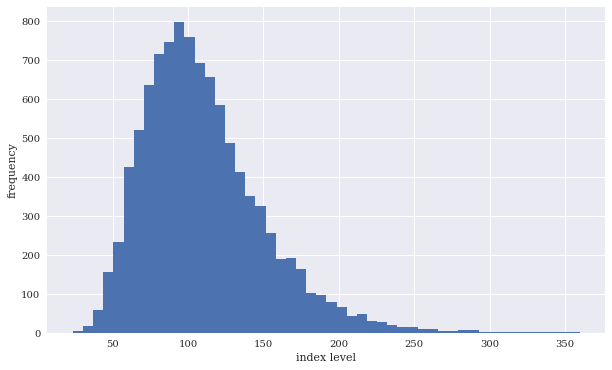

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

In [23]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         23.541         25.399
           max        360.000        411.595
          mean        110.294        109.833
           std         40.565         40.090
          skew          1.155          1.164
      kurtosis          2.402          2.615


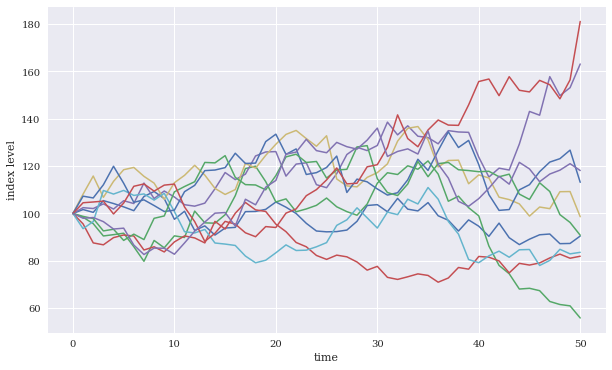

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

##### Square-root diffusion

In [25]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 100000
M = 50
dt = T / M

In [26]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + 
                 kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + 
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * 
                 math.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

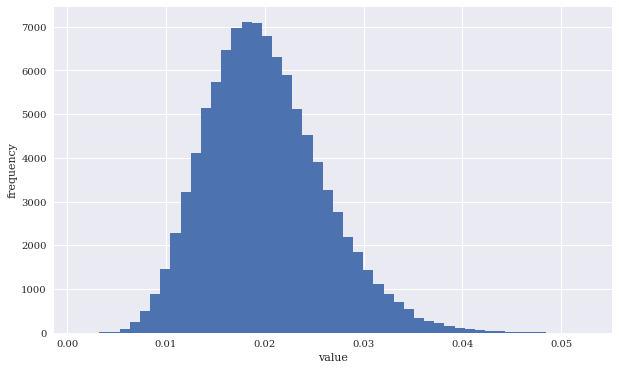

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

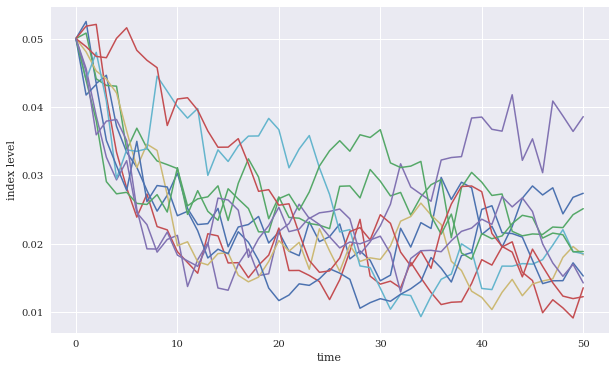

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [29]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

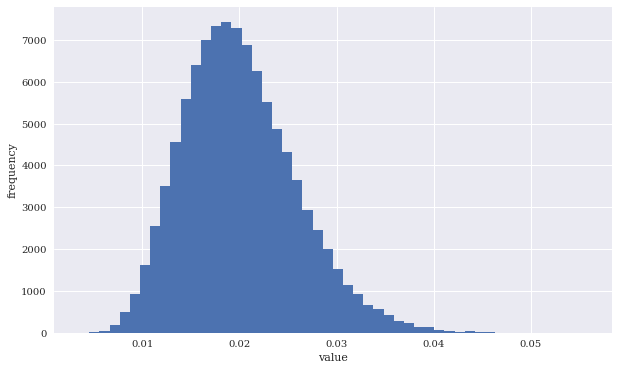

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

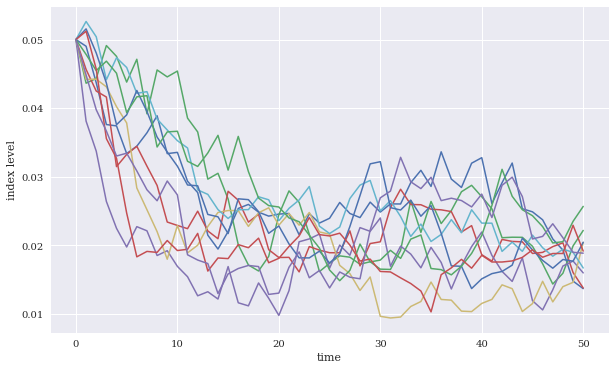

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

In [32]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size     100000.000     100000.000
           min          0.001          0.004
           max          0.053          0.056
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.554          0.579
      kurtosis          0.461          0.466


In [33]:
I = 250000
%time x1 = srd_euler()

CPU times: user 776 ms, sys: 124 ms, total: 900 ms
Wall time: 907 ms


In [34]:
%time x2 = srd_exact()

CPU times: user 1.77 s, sys: 6.41 ms, total: 1.78 s
Wall time: 1.79 s


In [35]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.003          0.003
           max          0.057          0.058
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.557          0.572
      kurtosis          0.474          0.487


##### Stochastic volatility

In [36]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [37]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [38]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [39]:
M = 50
I = 10000
dt = T / M

In [40]:
ran_num = npr.standard_normal((2, M + 1, I))

In [41]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [42]:
v[0] = v0
vh[0] = v0

In [43]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
             math.sqrt(dt) * ran[1])

In [44]:
v = np.maximum(vh, 0)

In [45]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                             np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

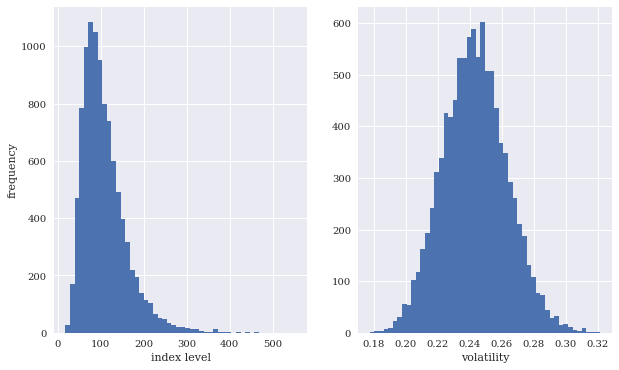

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');

In [47]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         17.816          0.177
           max        554.354          0.321
          mean        108.554          0.243
           std         52.613          0.020
          skew          1.695          0.157
      kurtosis          5.323          0.032


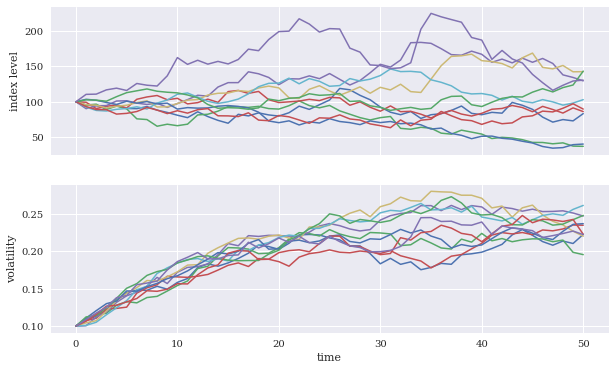

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');

##### Jump diffusion

In [49]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [50]:
T = 1.0
M = 50
I = 10000
dt = T / M

In [51]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                              sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) *
                       poi[t])
    S[t] = np.maximum(S[t], 0)

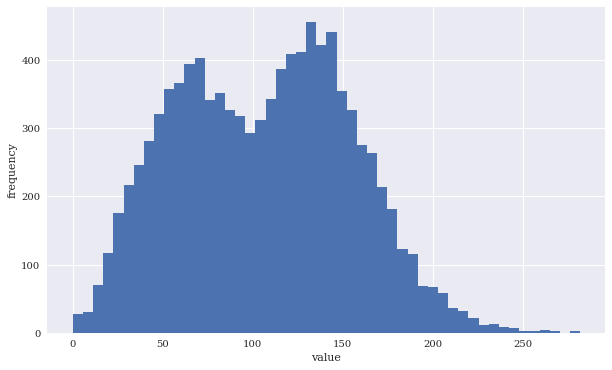

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

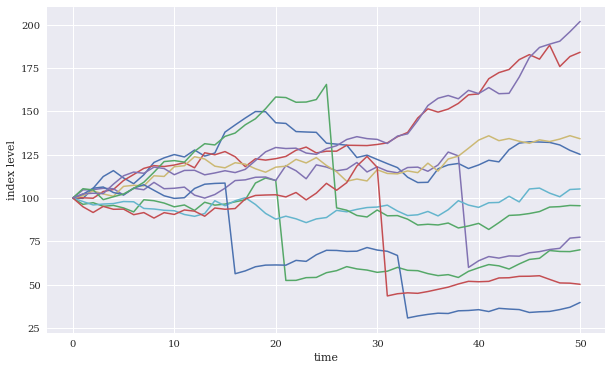

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

#### Variance Reduction

In [54]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [55]:
i ** 2 * 10000

8410000

In [56]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))

In [57]:
np.shape(sn)

(10000,)

In [58]:
sn.mean()

2.842170943040401e-18

In [59]:
print('%15s %15s' % ('Mean', 'Std.Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000/2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(),sn.std()))

           Mean   Std.Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [60]:
sn = npr.standard_normal(10000)

In [61]:
sn.mean()

-0.001165998295162494

In [62]:
sn.std()

0.991255920204605

In [63]:
sn_new = (sn - sn.mean()) / sn.std()

In [64]:
sn_new.mean()

-2.3803181647963357e-17

In [65]:
sn_new.std()

0.9999999999999999

In [66]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
    number of time intervals for discretization
    I: int
    number of paths to be simulated
    anti_paths: boolean
    use of antithetic variates
    mo_math: boolean
    use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [67]:
gen_sn(10, 2)

array([[ 0.6446, -0.6446],
       [ 0.7922, -0.7922],
       [ 0.1225, -0.1225],
       [ 1.8706, -1.8706],
       [ 0.019 , -0.019 ],
       [-0.8244,  0.8244],
       [-1.8197,  1.8197],
       [-0.8622,  0.8622],
       [ 0.5291, -0.5291],
       [-1.1947,  1.1947],
       [ 0.0215, -0.0215]])

### Valuation

#### European Options

In [68]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [69]:
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    Parameters
    ==========
    K: float
    (positive) strike price of the option
    Returns
    =======
    C0: float
    estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T
                     + sigma * math.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [70]:
gbm_mcs_stat(K = 105.)

10.046906314935837

In [71]:
M = 50

In [72]:
def gbm_mcs_dyna(K, option='call'):
    '''
    Valuation of European options in Black-Scholes-Merton 
    by Monte Carlo simulation (of index level paths) 
    Parameters 
    ========== 
    K: float 
    (positive) strike price of the option 
    option : string
    type of the option to be valued ('call', 'put') 
    Returns 
    ======= 
    C0: float 
    estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M+1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r-0.5*sigma**2)*dt
                               + sigma * math.sqrt(dt)*sn[t])
    # case-based calcutation of payoff
    if option == 'call':
        hT = np.maximum(S[-1]-K,0)
    else:
        hT = np.maximum(K-S[-1],0)
    # calculation of MCS estimator
    C0 = math.exp(-r*T)*np.mean(hT)
    return C0

In [73]:
gbm_mcs_dyna(K=110, option='call')

7.949894427695174

In [74]:
gbm_mcs_dyna(K=110, option='put')

12.630074542598441

577p~580p

from bsm_functions import bsm_call_value

bsm_functions 모듈이 설치가 안되서 패스

#### American Options 

In [75]:
def gbm_mcs_amer(K, option='call'):
    ''' 
    Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    Parameters
    ==========
    K : float
    (positive) strike price of the option
    option : string
    type of the option to be valued ('call', 'put')
    Returns
    =======
    C0 : float
    estimated present value of European call option
    '''
    dt = T / M
    df = math.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M+1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r-0.5*sigma**2)*dt
                               + sigma * math.sqrt(dt)*sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S-K,0)
    else:
        h = np.maximum(K-S,0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M-1,0,-1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * np.mean(V[1])
    return C0

In [76]:
gbm_mcs_amer(110., option='call')

7.771007279264398

In [77]:
gbm_mcs_amer(110., option='put')

13.657333771866613

Compares European and American option values for the same range of strikes as before to estimate the early exercise premium, this time with puts

In [78]:
euro_res = []
amer_res = []

In [79]:
k_list = np.arange(80., 120.1, 5.)

In [80]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

In [81]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

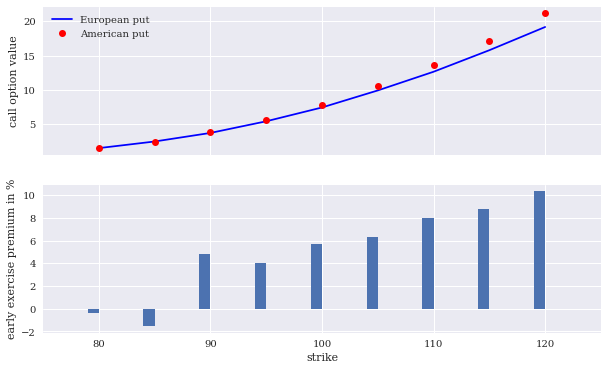

In [82]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125);

### Risk Measures

#### Value-at-Risk

In [83]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [84]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + 
                 sigma * np.sqrt(T) * npr.standard_normal(I))

In [85]:
R_gbm = np.sort(ST - S0)

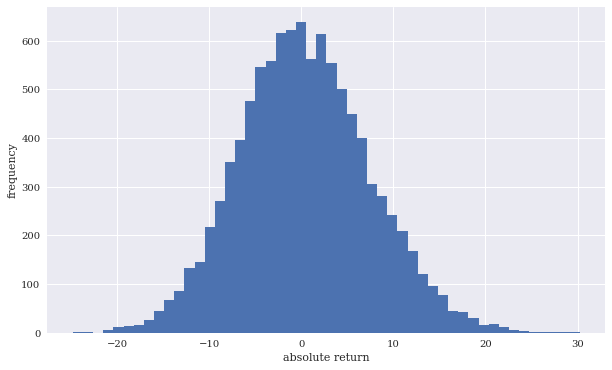

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency'); 

In [87]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.794
           99.90           19.922
           99.00           15.171
           97.50           12.877
           95.00           10.840
           90.00            8.406


In [88]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [89]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt 
                              + sigma * math.sqrt(dt) * sn1[t]) 
    + (np.exp(mu + delta * sn2[t]) - 1) 
    * poi[t])
    S[t] = np.maximum(S[t], 0)

In [90]:
R_jd = np.sort(S[-1] - S0)

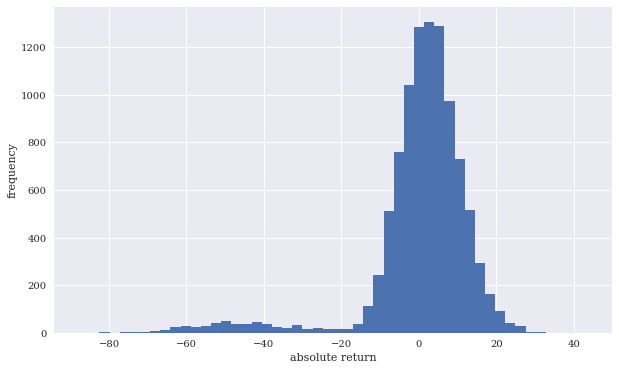

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

In [92]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           84.373
           99.90           72.868
           99.00           57.921
           97.50           47.206
           95.00           25.266
           90.00            8.811


In [93]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

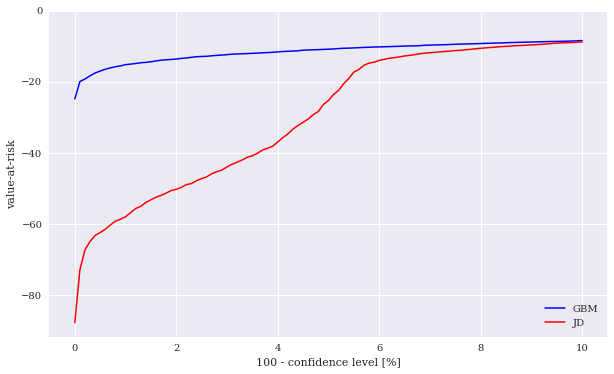

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);

#### Credit Valuation Adjustments

In [95]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

In [96]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * npr.standard_normal(I))

In [97]:
L = 0.5

In [98]:
p = 0.01

In [99]:
D = npr.poisson(p * T, I)

In [100]:
D = np.where(D > 1, 1, D)

In [101]:
math.exp(-r * T) * np.mean(ST)

99.98987237133275

In [102]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST)
CVaR

0.5264289387966999

In [103]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
S0_CVA

99.46344343253607

In [104]:
S0_adj = S0 - CVaR
S0_adj

99.4735710612033

In [105]:
np.count_nonzero(L * D * ST)

1046

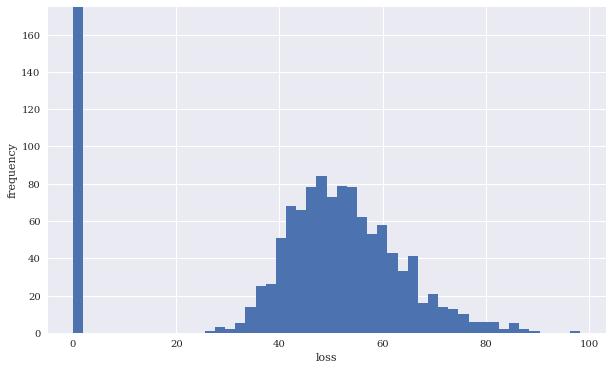

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);

In [111]:
K = 100
hT = np.maximum(ST - K, 0)

In [112]:
C0 = math.exp(-r*T)*np.mean(hT)
C0

10.443289224335714

In [113]:
CVaR = math.exp(-r*T)*np.mean(L*D*hT)
CVaR

0.05700129744922309

In [114]:
C0_CVA = math.exp(-r*T)*np.mean((1-L*D)*hT)
C0_CVA

10.38628792688649

In [115]:
np.count_nonzero(L*D*hT)

588

In [116]:
np.count_nonzero(D)

1046

In [117]:
I - np.count_nonzero(hT)

44183

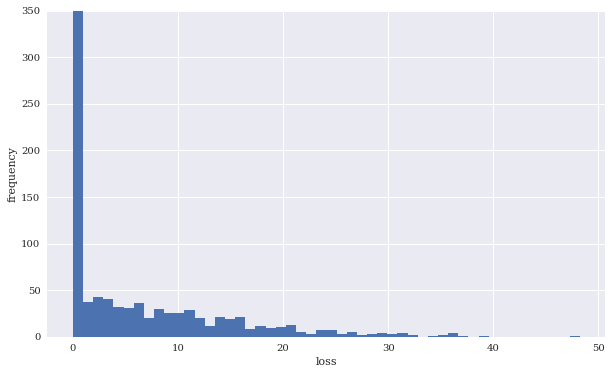

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350);